# **Zu beginn!!!**
Ich habe mich aus eigeninitiative und großem interesse dazu entschieden ein spezielles Feature zu testen. nämlich die korrelation zu anderen assets. Das Ergebnis würde ich gerne mit denen der anderen Teilnehmer vergleichen. Im idealfall liefert das feature bessere ergebnisse und ich hoffe dies ist im Rahmen des Labors in Ordnung, dass ich von Frame etwas abgewichen bin...

In [68]:
import numpy as np
import random
import pandas as pd
from pylab import mpl, plt
%matplotlib inline

import datetime
import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable


## Load data

In [69]:
!pip install yfinance

In [70]:
#get data from GitHub -> https://github.com/keuperj/DATA
!git clone https://github.com/keuperj/DATA.git

fatal: destination path 'DATA' already exists and is not an empty directory.


In [71]:
def stocks_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        df_temp = pd.read_csv("DATA/{}.us.txt".format(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
    return df

In [72]:
import os

data_dir = "DATA/"
# Liste aller Dateien im DATA-Verzeichnis
all_files = os.listdir(data_dir)

# Filtere nur die .us.txt-Dateien und extrahiere das Symbol
symbols = [
    filename.replace(".us.txt", "")
    for filename in all_files
    if filename.endswith(".us.txt")
]

print(symbols)


['ibm', 'aapl', 'goog']


dataset enthält nur die drei assts und noicht die die ich eigentlich auswählen wollte.. ich benötige msft und appl, warum, sehen wir gleich

[*********************100%***********************]  2 of 2 completed
<ipython-input-73-0cb17fdbb5ca>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = raw.reindex(dates).fillna(method='ffill')


                aapl       msft
2010-01-04  6.440332  23.254047
2010-01-05  6.451465  23.261557
2010-01-06  6.348847  23.118809
2010-01-07  6.337108  22.878374
2010-01-08  6.379238  23.036160


array([<Axes: >, <Axes: >], dtype=object)

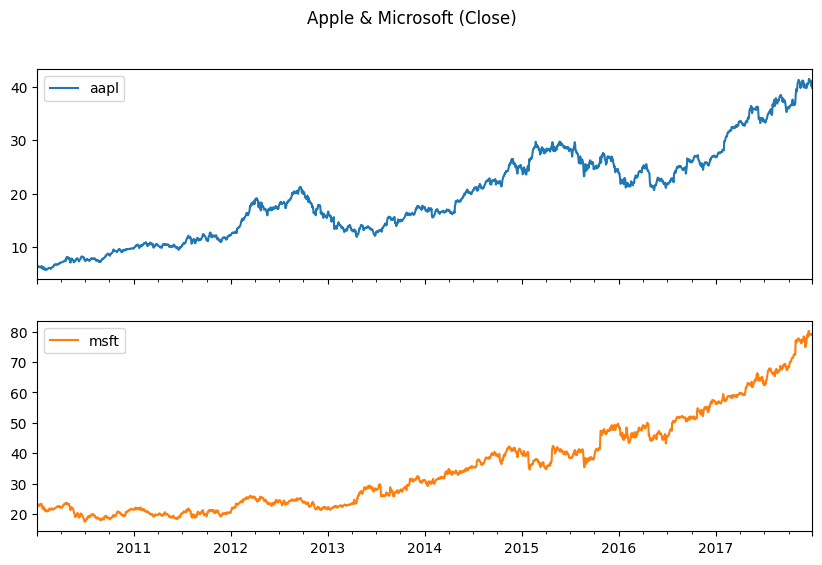

In [73]:


import yfinance as yf
import pandas as pd

# 1. Parameter definieren
symbols = ['AAPL', 'MSFT']
start   = '2010-01-02'
end     = '2017-12-31'
dates   = pd.date_range(start, end, freq='B')

# 2. Daten von Yahoo Finance herunterladen
#    yfinance liefert automatisch nur Business-Days, Spalte 'Close'
raw = yf.download(symbols, start=start, end=end, interval='1d')['Close']

# 3. In Deinen Business-Day-Index einpassen und fehlende Werte füllen
#    (sorgt dafür, dass exakt dieselben Datenpunkte wie mit Deinen lokalen Dateien entstehen)
df = raw.reindex(dates).fillna(method='ffill')

# 4. Spalten umbenennen (optional, damit sie lowercase wie vorher sind)
df.columns = [s.lower() for s in df.columns]

# 5. Ergebnis prüfen
print(df.head())
df.plot(figsize=(10,6), subplots=True, title='Apple & Microsoft (Close)')


In [74]:
"""dates = pd.date_range('2015-01-02','2016-12-31',freq='B')
symbols = ['goog','ibm','aapl']
df = stocks_data(symbols, dates)
df.fillna(method='pad', inplace=True)
df.plot(figsize=(10, 6), subplots=True);"""

"dates = pd.date_range('2015-01-02','2016-12-31',freq='B')\nsymbols = ['goog','ibm','aapl']\ndf = stocks_data(symbols, dates)\ndf.fillna(method='pad', inplace=True)\ndf.plot(figsize=(10, 6), subplots=True);"

In [75]:
df.head()

,aapl,msft
2010-01-04,6.440332,23.254047
2010-01-05,6.451465,23.261557
2010-01-06,6.348847,23.118809
2010-01-07,6.337108,22.878374
2010-01-08,6.379238,23.036160


In [76]:
#warum msft und apple? folgende Quelle liefert eine korrelationsanalyse mit mehreren verfahren, wie unten beschrieben... unten sieht man auch,
#durch die euklidische nähe von msft und aapl, sowie deren dicke und farbe der verbindungslinie eine starke korrelation,
#aus dem chart weiter oben lässt sich dies ebenfalls unschwer erkennen

4. Visualization
The output of the 3 models (sparse inverse covariance estimation represented by Lasso Cross-Validation, clustering using Affinity Propagation, 2D embedding with Manifold learning) are combined in a 2D graph where nodes represent the stocks and edges represent the connections between stocks:

the sparse covariance model is used to display the strength of the edges
cluster labels are used to define the color of the nodes
the 2D embedding is used to position the nodes in the graph
This example has a fair amount of visualization-related code, as visualization is crucial here to display the graph. One of the challenges is to position the labels minimizing overlap. For this we use a heuristic based on the direction of the nearest neighbor along each axis.

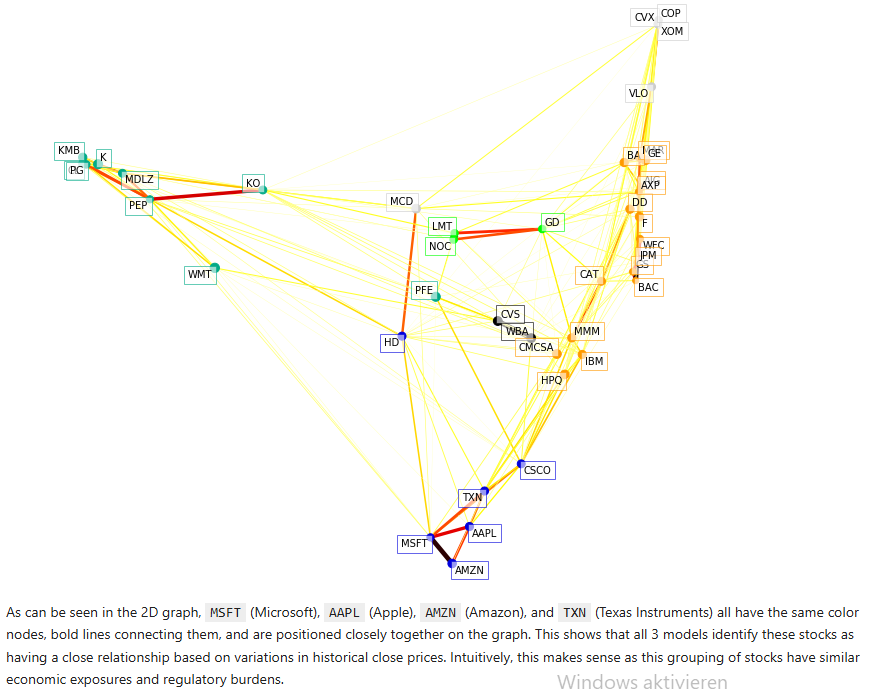

 quelle: https://github.com/AlphaWaveData/Jupyter-Notebooks/blob/master/AlphaWave%20Data%20Machine%20Learning%20for%20Stock%20Trading%20Unsupervised%20Techniques%20example.ipynb

In [77]:
import yfinance as yf
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# 1) Daten laden und Renditen berechnen
symbols = ['AAPL','MSFT']
start, end = '2015-01-02','2016-12-31'
df = yf.download(symbols, start=start, end=end)['Close']
df = (
    df.rename(columns=lambda s: s.lower())
      .asfreq('B')
      .ffill()  # ersetzt .fillna(method='ffill')
)


[*********************100%***********************]  2 of 2 completed


In [78]:
!apt-get update && \
 apt-get install -y python3-dev python3-numpy-dev


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


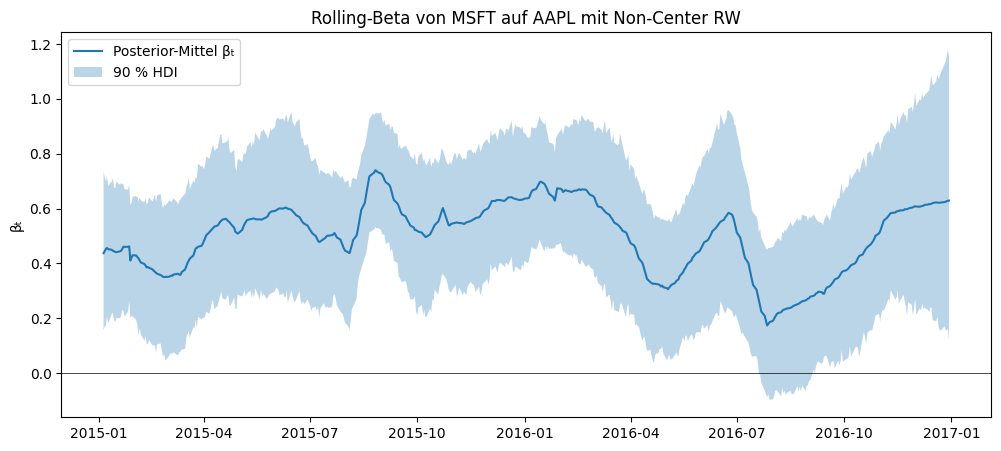

In [79]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# 1) Renditen
rets = df.pct_change().dropna()
r1, r2 = rets['aapl'].values, rets['msft'].values
T = len(rets)

with pm.Model() as model:
    # Non-centered parametrisierung der Random Walk-Deltas
    σ_rw = pm.Exponential('σ_rw', 1.0)
    Δβ  = pm.Normal('Δβ', mu=0, sigma=σ_rw, shape=T)
    β0  = pm.Normal('β0', mu=0, sigma=0.5)
    β   = pm.Deterministic('beta', β0 + pm.math.cumsum(Δβ))

    # Likelihood
    σ_obs = pm.HalfNormal('σ_obs', sigma=0.1)
    μ = β * r1
    pm.Normal('obs', mu=μ, sigma=σ_obs, observed=r2)

    # Sampling mit höherem target_accept und robusterem Init
    trace = pm.sample(
        draws=1000,
        tune=2000,
        chains=2,
        cores=1,
        target_accept=0.99,
        init="jitter+adapt_diag"
    )

# 2) Posterior-Mittel & HDI ausrechnen
β_post = trace.posterior['beta'].mean(dim=('chain','draw'))
hdi = az.hdi(trace, var_names=['beta'], hdi_prob=0.9)['beta']

# 3) Plotten
dates = rets.index
plt.figure(figsize=(12,5))
plt.plot(dates, β_post, label='Posterior-Mittel βₜ')
plt.fill_between(
    dates,
    hdi.sel(hdi='lower'),
    hdi.sel(hdi='higher'),
    alpha=0.3,
    label='90 % HDI'
)
plt.axhline(0, color='black', lw=0.5)
plt.title('Rolling-Beta von MSFT auf AAPL mit Non-Center RW')
plt.ylabel('βₜ')
plt.legend()
plt.show()


mir scheint irgendwas mit hdi noch etwas nicht zu stimmen, das übergehe ich aus zeitgründen allerdings erstmal. jedenfalls sieht man eine schöne meist deutlich ausgeprägte positive korrelation zwischen den beiden assets

In [80]:
"""dates = pd.date_range('2010-01-02','2017-10-11',freq='B')
df1=pd.DataFrame(index=dates)
df_ibm=pd.read_csv("DATA/ibm.us.txt", parse_dates=True, index_col=0)
df_ibm=df1.join(df_ibm)
df_ibm[['Close']].plot(figsize=(15, 6))
plt.ylabel("stock_price")
plt.title("IBM Stock")
plt.show()"""

'dates = pd.date_range(\'2010-01-02\',\'2017-10-11\',freq=\'B\')\ndf1=pd.DataFrame(index=dates)\ndf_ibm=pd.read_csv("DATA/ibm.us.txt", parse_dates=True, index_col=0)\ndf_ibm=df1.join(df_ibm)\ndf_ibm[[\'Close\']].plot(figsize=(15, 6))\nplt.ylabel("stock_price")\nplt.title("IBM Stock")\nplt.show()'

In [81]:
"""df_ibm=df_ibm[['Close']]
df_ibm.info()"""

"df_ibm=df_ibm[['Close']]\ndf_ibm.info()"

In [82]:
print(df)

Ticker           aapl       msft
Date                            
2015-01-02  24.320425  40.072136
2015-01-05  23.635283  39.703629
2015-01-06  23.637516  39.120895
2015-01-07  23.968966  39.617928
2015-01-08  24.889906  40.783428
...               ...        ...
2016-12-26  26.948002  57.198078
2016-12-27  27.119141  57.234257
2016-12-28  27.003506  56.971958
2016-12-29  26.996563  56.890549
2016-12-30  26.786106  56.203159

[521 rows x 2 columns]


ein walkforward window wäre hier sicherlich die robustere evaluationstechnik...

In [83]:
import numpy as np
import pandas as pd

def load_data_with_beta(df: pd.DataFrame, beta: np.ndarray, look_back: int):
    """
    Erstellt train/test-Sets aus den Spalten ['aapl','msft'] + dem Rolling-Beta β_t.

    Args:
      df        DataFrame mit Index Länge L und Spalten ['aapl','msft'].
      beta      1D-Array Länge M mit Posterior-Mittel β_t.
      look_back Fenstergröße (z.B. 60).

    Returns:
      x_train, y_train, x_test, y_test
      x_*: (N, look_back-1, 3), y_*: (N, 3)
    """
    # 1) Länge angleichen: wir verwenden nur die letzten M Zeilen von df
    L = len(df)
    M = len(beta)
    if L != M:
        if M < L:
            df = df.iloc[-M:].copy()
        else:
            raise ValueError(f"beta (L={M}) länger als df (L={L})!")

    # 2) Beta als neue Spalte hinzufügen
    df_ext = df.copy()
    df_ext['beta'] = beta

    # 3) in NumPy-Array umwandeln
    data = df_ext.values       # Form: (M, 3)

    # 4) Sliding Windows erzeugen
    seqs = []
    for i in range(len(data) - look_back):
        seqs.append(data[i : i + look_back])
    seqs = np.array(seqs)      # (M-look_back+1, look_back, 3)

    # 5) Features & Targets
    X = seqs[:, :-1, :]        # (N, look_back-1, 3)
    Y = seqs[:,  -1, :]        # (N, 3)

    # 6) 80/20 Split
    N       = X.shape[0]
    n_test  = int(np.round(0.2 * N))
    n_train = N - n_test

    x_train = X[:n_train]
    y_train = Y[:n_train]
    x_test  = X[n_train:]
    y_test  = Y[n_train:]

    return x_train, y_train, x_test, y_test

  # df enthält deine aapl- und msft-Preise, beta_post dein Posterior-Mittel von βₜ
look_back = 60
x_train, y_train, x_test, y_test = load_data_with_beta(df[['aapl','msft']], β_post, look_back)

print("x_train.shape =", x_train.shape)  # → (N_train, 59, 3)
print("y_train.shape =", y_train.shape)  # → (N_train,    3)
print("x_test.shape  =", x_test.shape)   # → (N_test,  59, 3)
print("y_test.shape  =", y_test.shape)   # → (N_test,     3)



x_train.shape = (368, 59, 3)
y_train.shape = (368, 3)
x_test.shape  = (92, 59, 3)
y_test.shape  = (92, 3)


## Assingment: Build LSTM
* build a PyTorch LSTM model
* train and evaluate
* plot prediction and true stock valaues

Epoch 001/100 — Train MSE: 0.177492
Epoch 010/100 — Train MSE: 0.143572
Epoch 020/100 — Train MSE: 0.123224
Epoch 030/100 — Train MSE: 0.083673
Epoch 040/100 — Train MSE: 0.042695
Epoch 050/100 — Train MSE: 0.030173
Epoch 060/100 — Train MSE: 0.023153
Epoch 070/100 — Train MSE: 0.018788
Epoch 080/100 — Train MSE: 0.017078
Epoch 090/100 — Train MSE: 0.015186
Epoch 100/100 — Train MSE: 0.014417

Test RMSE (MSFT): 2.5572 USD


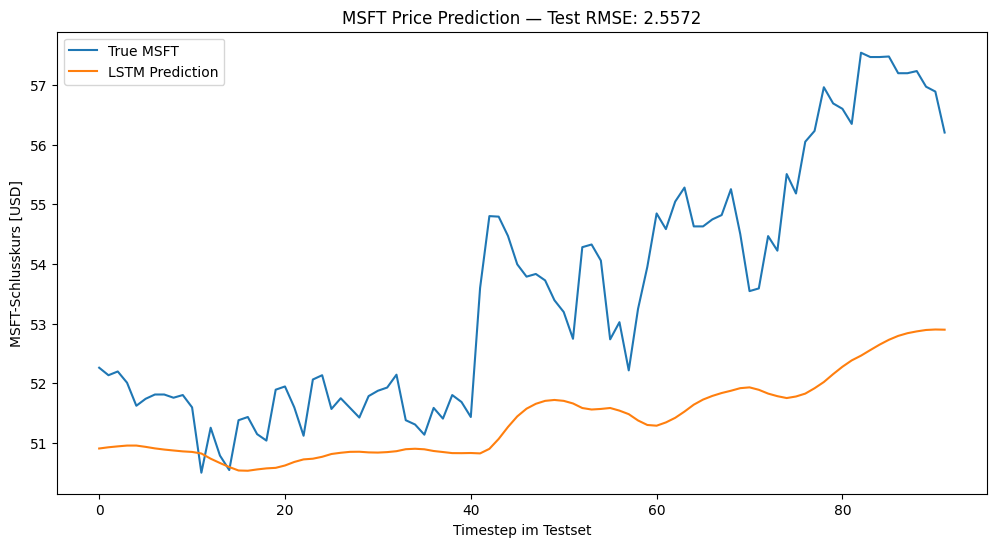

In [84]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --- Voraussetzungen:
# df        : pd.DataFrame mit Index DatetimeIndex und Spalten ['aapl','msft']
# beta_post : Xarray DataArray oder np.ndarray Länge len(df) mit Posterior-Mittel βₜ

# --- 1) Länge angleichen und Features erstellen ---
# 1.1) Beta in NumPy-Array umwandeln
beta_arr = β_post.values if hasattr(β_post, "values") else np.array(β_post)
beta_arr = beta_arr.reshape(-1, 1)                  # Shape = (M,1)
M = beta_arr.shape[0]

# 1.2) df auf die letzten M Zeilen zuschneiden
df_trim = df.iloc[-M:].copy()                       # Shape = (M,2)

# 1.3) AAPL & MSFT auf [-1,1] skalieren
feature_scaler = MinMaxScaler(feature_range=(-1,1))
scaled_feats   = feature_scaler.fit_transform(df_trim[['aapl','msft']].values)  # (M,2)

# 1.4) Kombinieren zu (M,3)
data = np.hstack([scaled_feats, beta_arr])          # (M,3)

# 1.5) Sliding-Window → X, y (MSFT nächsten Tag als Target)
look_back = 60
X, y = [], []
for i in range(len(data) - look_back):
    X.append(data[i : i + look_back])               # (look_back,3)
    y.append(data[i + look_back, 1])                # MSFT-Spalte als Ziel
X = np.array(X)                                     # (N, look_back, 3)
y = np.array(y).reshape(-1,1)                       # (N,1)

# 1.6) Train/Test-Split (80/20)
N       = len(X)
n_test  = int(0.2 * N)
n_train = N - n_test
x_train, x_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# --- 2) Torch-Tensoren ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_tr = torch.from_numpy(x_train).float().to(device)  # (n_train, look_back, 3)
y_tr = torch.from_numpy(y_train).float().to(device)  # (n_train, 1)
x_te = torch.from_numpy(x_test).float().to(device)   # (n_test, look_back, 3)
y_te = torch.from_numpy(y_test).float().to(device)   # (n_test, 1)

# --- 3) LSTM-Modell ---
class MultiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)       # out: [batch, seq_len, hidden_dim]
        last   = out[:, -1, :]      # nur letzter Zeitschritt
        return self.fc(last)        # [batch, output_dim]

input_dim  = 3    # [aapl, msft, beta]
hidden_dim = 32
num_layers = 2
output_dim = 1    # next-day MSFT

model     = MultiLSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- 4) Training ---
epochs = 100
for ep in range(1, epochs+1):
    model.train()
    optimizer.zero_grad()
    pred = model(x_tr)
    loss = criterion(pred, y_tr)
    loss.backward()
    optimizer.step()
    if ep % 10 == 0 or ep == 1:
        print(f"Epoch {ep:03d}/{epochs} — Train MSE: {loss.item():.6f}")

# --- 5) Evaluation ---
model.eval()
with torch.no_grad():
    pred_test = model(x_te).cpu().numpy()   # skaliert
    true_test = y_te.cpu().numpy()          # skaliert

# --- 6) Rücktransformation MSFT ---
msft_idx = 1
pad       = np.zeros_like(pred_test)
inv_pred  = feature_scaler.inverse_transform(np.hstack([pad, pred_test]))
inv_true  = feature_scaler.inverse_transform(np.hstack([pad, true_test]))
pred_msft = inv_pred[:, msft_idx].reshape(-1,1)
true_msft = inv_true[:, msft_idx].reshape(-1,1)

rmse = np.sqrt(mean_squared_error(true_msft, pred_msft))
print(f"\nTest RMSE (MSFT): {rmse:.4f} USD")

# --- 7) Plot ---
plt.figure(figsize=(12,6))
plt.plot(true_msft, label='True MSFT')
plt.plot(pred_msft, label='LSTM Prediction')
plt.xlabel('Timestep im Testset')
plt.ylabel('MSFT-Schlusskurs [USD]')
plt.title(f"MSFT Price Prediction — Test RMSE: {rmse:.4f}")
plt.legend()
plt.show()


Das ergebnis mit ... ist okay, aber nicht weltbewegend... handeln würde ich damit sicherlich nicht. es müssten metriken wie die sharpe ratio oder den cagr herangezogen werden. außerdem sind die trainingsdaten mMn einfach zu wenig, ein niedrigeres Zeitfenster wäre vielleicht hilfreicher, würde allerdings mehr rauschen einbringen